In [1]:
import os
import glob
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

Processing /home/cc/ipa/energy_comparison/energy-video-mul-1.log with label: IPA
Processing /home/cc/ipa/energy_comparison/energy-video-mul-4.log with label: IPA-QL


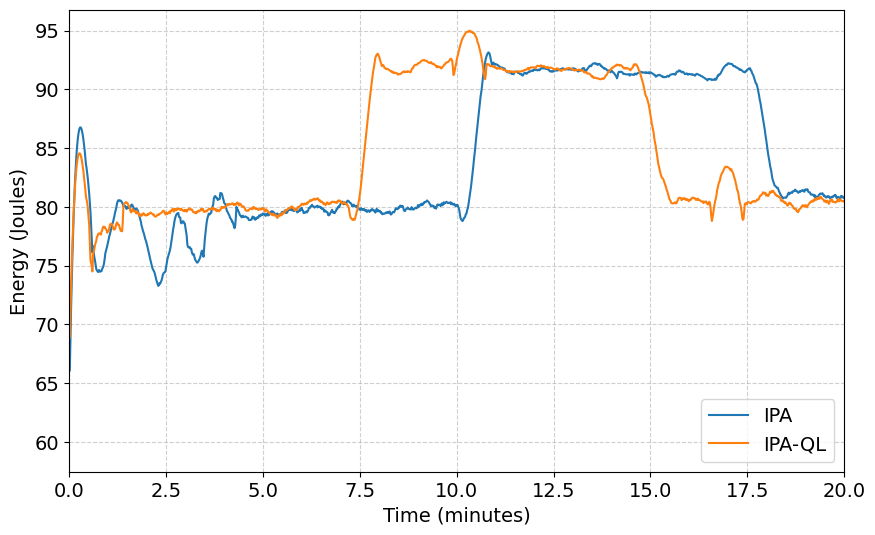

In [2]:
# Constants
workload_labels = ['IPA', 'IPA-QL']
log_files = ['/home/cc/ipa/energy_comparison/energy-video-mul-1.log', '/home/cc/ipa/energy_comparison/energy-video-mul-4.log']  # Replace with actual file paths

# Initialize storage for each file
experiments = [
    {'times': [], 'energy_pkg': [], 'label': workload_labels[i]} for i in range(2)
]

# Process each log file
for idx, log_file in enumerate(log_files):
    label = workload_labels[idx]
    print(f"Processing {log_file} with label: {label}")

    # Dictionaries to hold energy readings indexed by time
    time_to_energy_pkg = {}

    # Open and read the log file
    with open(log_file, 'r') as file:
        for line in file:
            line = line.strip()
            # Skip empty lines and lines starting with '#'
            if not line or line.startswith('#'):
                continue
            # Split the line into parts
            parts = line.split()
            if len(parts) < 4:
                continue
            time_str, value_str, unit, event = parts[:4]
            try:
                time = float(time_str)
                value = float(value_str)
            except ValueError:
                continue

            # Store the energy readings indexed by time
            if event == 'power/energy-pkg/':
                time_to_energy_pkg[time] = value

    # Combine readings at each timestamp
    times = sorted(time_to_energy_pkg.keys())
    for time in times:
        energy_pkg = time_to_energy_pkg[time]
        time_minutes = time / 60
        experiments[idx]['times'].append(time_minutes)
        experiments[idx]['energy_pkg'].append(energy_pkg)

# Plotting the data for the two files
plt.figure(figsize=(10, 6))
for experiment in experiments:
    times = experiment['times']
    energy_pkg = experiment['energy_pkg']
    label = experiment['label']

    if not times:
        print(f"No data to plot for {label}.")
        continue

    # Determine window size for smoothing
    data_length = len(energy_pkg)
    window_size = min(51, data_length - (1 - data_length % 2))
    poly_order = 3
    if data_length >= window_size and window_size > poly_order:
        energy_pkg_smoothed = savgol_filter(energy_pkg, window_size, poly_order)
    else:
        energy_pkg_smoothed = energy_pkg

    plt.plot(
        times,
        energy_pkg_smoothed,
        label=label
    )

plt.xlabel('Time (minutes)', fontsize=14)
plt.ylabel('Energy (Joules)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0, 20)  # Each experiment lasts 20 minutes
plt.legend(loc='lower right', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Save the plot
output_dir = 'plots'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f'{output_dir}/new_energy_plot_comparison.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.close()
